In [33]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy.linalg import inv

In [34]:
data = datasets.load_boston()
N = len(data.data[:, 0])
X = np.array([data.data[:, 0], data.data[:, 5]])
X = X.T
Y = data.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 2)

In [35]:
class AdalineRegressor:
    def __init__(self):
        pass
    

    def fit(self, X_train, Y_train):
        self.w = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, Y_train))

        
    def predict(self, X_test):
        Y_predic = np.matmul(X_test, self.w)
        return Y_predic
    

    def evaluation(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        subtract = np.abs(Y_test - Y_predic)
        average = np.mean(subtract)

        mae=np.mean(subtract)
        mse=np.mean((subtract)**2)


        return average, mae, mse


In [36]:
model = AdalineRegressor()
model.fit(X_train, Y_train)

Text(0.5, 0, 'Price')

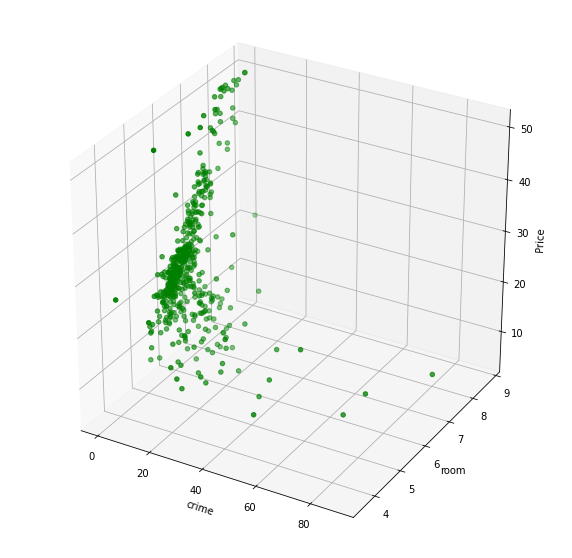

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:,0], X[:,1], Y, c= 'green')

ax.set_xlabel('crime')
ax.set_ylabel('room')
ax.set_zlabel('Price')

In [39]:
Y_pred = model.predict(X)

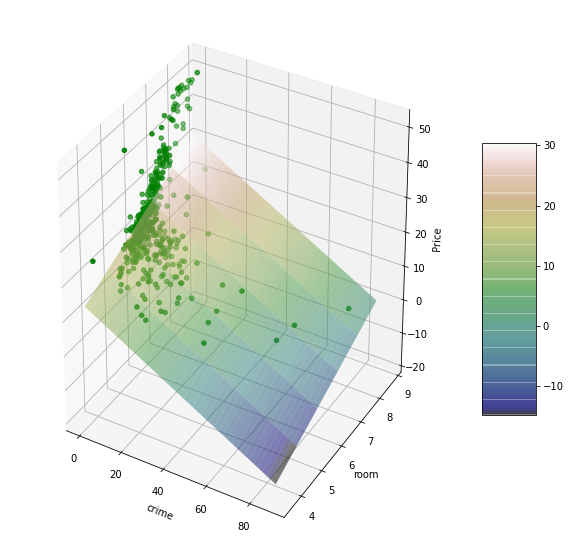

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


X_plan, Y_plan = np.meshgrid(np.arange(X_train[:,0].min(), X_train[:,0].max()),
                             np.arange(X_train[:,1].min(), X_train[:,1].max()))

Z = X_plan * model.w[0] + Y_plan * model.w[1]

mycmap = plt.get_cmap('gist_earth')
surf = ax.plot_surface(X_plan, Y_plan, Z, cmap = mycmap,  alpha = 0.5)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.scatter(X[:,0], X[:,1], Y, c= 'green')

ax.set_xlabel('crime')
ax.set_ylabel('room')
ax.set_zlabel('Price')

plt.show()

In [42]:
result = model.evaluation(X_test, Y_test)
print('evaluation: ',result[0],' mae: ',result[1], ' mse: ', result[2])

evaluation:  4.7193361603666375  mae:  4.7193361603666375  mse:  39.446176299204346
